# week_06

## nltk.corpus

In [1]:
import nltk.book
from nltk.book import *
nltk.download('book', quiet = True)

from nltk.corpus import gutenberg
nltk.download('gutenberg', quiet = True)

from nltk.corpus import brown
nltk.download('brown', quiet = True)


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


True

In [2]:
brown = nltk.corpus.brown

In [3]:
cfd1 = nltk.ConditionalFreqDist(

    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples = modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [4]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(

    (genre, modals)
    for genre in brown.categories()
    
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories = genre)
        if word.lower() == modals
)

cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [5]:
cfd2.plot()

<Figure size 640x480 with 1 Axes>

#### Inaugural

In [6]:
inaugural = nltk.corpus.inaugural

In [7]:
inaugural.fileids() # 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [8]:
# inaugural에서 america, citizen의 빈도수, 연도별로

cfd3 = nltk.ConditionalFreqDist(

    (fileid[:-4], target_word)
    
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    for word in inaugural.words(fileid)
        if word.lower().startswith(target_word)
)

cfd3.tabulate()

                america citizen 
1789-Washington       2       5 
1793-Washington       1       1 
     1797-Adams       8       6 
 1801-Jefferson       0       7 
 1805-Jefferson       1      10 
   1809-Madison       0       1 
   1813-Madison       1       4 
    1817-Monroe       1      14 
    1821-Monroe       2      15 
     1825-Adams       0       3 
   1829-Jackson       0       2 
   1833-Jackson       2       3 
  1837-VanBuren       2       7 
  1841-Harrison       7      38 
      1845-Polk       0      11 
    1849-Taylor       2       2 
    1853-Pierce       2       4 
  1857-Buchanan       3       7 
   1861-Lincoln       2       7 
   1865-Lincoln       1       0 
     1869-Grant       0       5 
     1873-Grant       0       3 
     1877-Hayes       1       9 
  1881-Garfield       2       9 
 1885-Cleveland       4      13 
  1889-Harrison       6      12 
 1893-Cleveland       9      10 
  1897-McKinley       9      10 
  1901-McKinley       7       2 
 1905-Roos

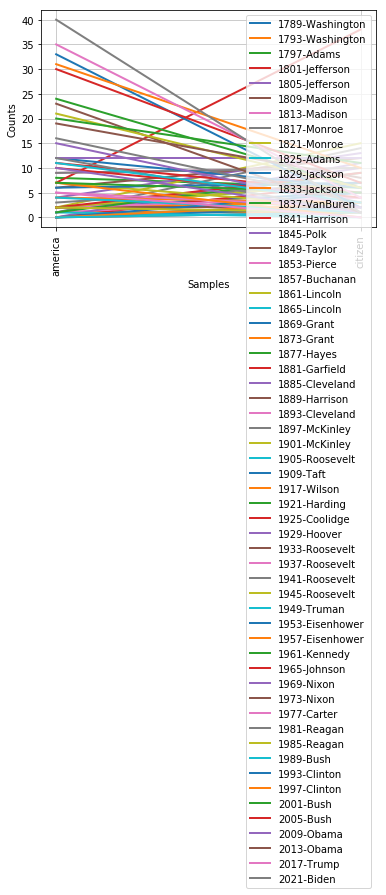

In [9]:
cfd3.plot()

## Tuple & List

### 생성하기

In [10]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

### 요소가 2개 이상일 때

In [11]:
listA = ['a', 'b']
tupleA = 'a', 'b'
tupleA = ('a', 'b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

### 요소가 1개일 때

In [12]:
listA = ['a']

tupleA = ('a',) # 콤마 안 붙이면 스트링이 됨.
tupleA = 'a',

tupleA, listA

(('a',), ['a'])

In [13]:
ex = ('a')
type(ex)

str

### 여러 변수 할당하기
- packing : 한 변수에 여러 개의 데이터를 할당
    - 리스트, 튜플 자체가 a = [1,2,3,4]
- unpacking : 여러 변수에 하나의 데이터를 할당, 그것을 각각의 변수로 변환하는 것
    - a, b, c = [1, 2, 3]

In [14]:
name = "lee"
a, b, c = name
a, b, c # unpacking

('l', 'e', 'e')

In [15]:
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'
temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

pwd, userId = userId, pwd
pwd, userId

('abcd', 'hello')

### 연산
- 리스트도 동일

In [16]:
('a',) + ('b', 'c')

('a', 'b', 'c')

In [17]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [18]:
a = 1, 2
b = 1, 3

a > b, a < b

(False, True)

### 순회하기

In [19]:
a = 1, 2, 3, 4, 5
for i in a:
    print(i)

1
2
3
4
5


### list comprehension
- tuple? (x)

In [20]:
# 1.
tuple([word for word in a])

# 2. 느림
*[word for word in a],

(1, 2, 3, 4, 5)

### 튜플은 불변 객체이다.
- a = 1, 2, 3, 4
- 코드 수정할 때 수정할 수 없게 하고 싶으면 튜플 사용
- key 값을 저장 (blue = 1, white = 2,,,)
- 메모리 사용이 적다

In [21]:
a = (1,) 
b = (1, 2, 3)
id(a), id(a + b) # 수정이 아닌 다른 객체에 할당한 것.

(187340720, 187188544)

### 형 변환
- tuple()

In [22]:
tuple('cat'), ('cat',) # 다른 것

(('c', 'a', 't'), ('cat',))

In [23]:
list('cat'), ['cat'] # 다른 것

(['c', 'a', 't'], ['cat'])

In [24]:
a = tuple('cat')
a[0] # 인덱스 접근

'c'

### 튜플의 장점
    - 타인이 변경하는 것을 막을 수 있다. -> 가장 큰 차이점
    - 메모리 사용 적다.
    
### 리스트 장점
    - 데이터 순차적으로 파악하기 좋다.
    - 중복되는 데이터를 포함할 수 있다.

### List 관련 함수

#### 1. 항목 변경하기

In [25]:
days = ['월', '화', '수', '목']

# .append() : 마지막에 요소 추가
days.append('금') 

In [26]:
days 

['월', '화', '수', '목', '금']

In [27]:
# .insert() : 인덱스 위치 지정 가능
days.insert(2, '토')

In [28]:
days

['월', '화', '토', '수', '목', '금']

In [29]:
# .extend() : 병합
listA = ['토', '일']
days.extend(listA)

In [30]:
days

['월', '화', '토', '수', '목', '금', '토', '일']

In [31]:
days.append(listA) # append는 리스트 자체가 하나의 원소로 추가됨.

In [32]:
days

['월', '화', '토', '수', '목', '금', '토', '일', ['토', '일']]

In [33]:
days += listA # 병합과 동일
days

['월', '화', '토', '수', '목', '금', '토', '일', ['토', '일'], '토', '일']

In [34]:
# 인덱스로 접근
days[-3] = '공휴일'

In [35]:
days

['월', '화', '토', '수', '목', '금', '토', '일', '공휴일', '토', '일']

In [36]:
days[:3] = 1, 2 # 개수 달라도 상관 없음, 단 개수 적어도 0 ~ 2 인덱스까지 덮어씌워짐
days

[1, 2, '수', '목', '금', '토', '일', '공휴일', '토', '일']

In [37]:
days[:3] = 'cat'
days

['c', 'a', 't', '목', '금', '토', '일', '공휴일', '토', '일']

In [38]:
# a = 1, 2, 3, 4, 5
a = list(range(1, 6))
a

[1, 2, 3, 4, 5]

#### 삭제하기

In [39]:
# 1. offset
del days[0] # 자리가 보존되지 않고 요소들이 하나씩 앞당겨짐.
days

['a', 't', '목', '금', '토', '일', '공휴일', '토', '일']

In [40]:
# 2. 특정 값 삭제
days.remove('토') # 처음 만난 것만 삭제, 전부 삭제 아님.
days

['a', 't', '목', '금', '일', '공휴일', '토', '일']

In [41]:
# 3. pop(index) default = pop(-1) -> 맨 마지막 요소 삭제
days.pop() # 삭제된 값 반환됨.

'일'

In [42]:
days # 리스트에도 반영

['a', 't', '목', '금', '일', '공휴일', '토']

In [43]:
# 전부 비움
days.clear()
days

[]

#### 값 찾기

In [44]:
a = list(range(5))
a.index(2)

2

In [45]:
# 값 확인
3 in a

True

#### 정렬하기
- 리스트.sort(reverse) : 정렬한 뒤 값 반환하지 않고 기존 값 변경되어 있음.
- sorted(리스트, reverse) : 정렬된 복사본을 반환, 기존 값은 유지

- 리스트.reverse() : 반환 X, 기존 값 변경
- reversed(리스트) : 반환 O, 기존 값 유지

In [46]:
b = sorted(a, reverse = True) # 정렬된 복사본을 반환, 원본에는 영향 X

In [47]:
a, b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [48]:
b.sort()

In [49]:
b

[0, 1, 2, 3, 4]

In [50]:
b.reverse()

In [51]:
b

[4, 3, 2, 1, 0]

In [52]:
c = list(reversed(b)) # reversed()는 리버스 된 리스트 반환하는게 아니라 리스트의 주소를 반환함. 따라서 list()로 묶어줘야 함.
c

[0, 1, 2, 3, 4]

#### 할당하기
- = 으로 할당할 때에는 하나의 값이 변하면 같이 변함. 메모리 주소를 참조하고 있으므로.
- shallow copy
    - a가 변해도 b가 변하지 않는 복사
- deep copy
    - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지

In [53]:
a

[0, 1, 2, 3, 4]

In [54]:
b = a # [0, 1, 2, 3, 4]에 a, b가 메모리 주소를 참조함.
b[0] = 7
b

[7, 1, 2, 3, 4]

In [55]:
a # a도 바뀜

[7, 1, 2, 3, 4]

In [56]:
id(a), id(b)

(187228888, 187228888)

In [57]:
a.append([6, 7, 8])
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [58]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [59]:
a[-1][0] = 0

In [60]:
a, e

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [61]:
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [62]:
f[-1][-1] = 9
a, f # a는 안 변하고, f는 변함.

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

#### 순회하기
- zip() : 여러 개의 리스트 동시 순회
- enumerate()
- range()

In [63]:
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b) : # 아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [64]:
list(zip(a, b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [65]:
dict(zip(a, b))

{1: 'mon', 2: 'tue', 3: 'wed'}

- zip()은 아래와는 다름.

for i in a :
    for j in b :

In [67]:
# enumerate() : 요소에 번호 매겨짐
for idx, item in enumerate(b) :
    print((idx, item)) 

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


#### 리스트 컴프리헨션

In [69]:
ex= [(nal,day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습문제
- 리스트 -> for문으로
- for문을 사용하여 ex를 구현하기
    - a, b 

In [71]:
ex = []

for nal, day in zip(a, b) :
    ex.append((nal, day))
    
print(ex)

[(1, 'mon'), (2, 'tue'), (3, 'wed')]


In [72]:
# for nal in a
    # for day in b
[(nal, day) for nal in a for day in b]

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

In [73]:
sentence = "don't judge a book by its cover"
# (대문자, 타이틀, 글자수) 형태로 저장된 리스트 만들어라.


[(word.upper(), word.title(), len(word)) for word in sentence.split()]


[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [74]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

# 2.1 문장으로 구성된 리스트로 만들기
    # ['hello guys', 'how are you']
        
# 2.2 전체 단어를 하나의 리스트로 가져오기
    # ['', '', '', '']
    
# 2.3  전체를 스트링으로 가져오기
    # 'hello guys how are you'

In [75]:
# 2.1
[" ".join(list) for list in text]

['hello guys', 'how are you']

In [76]:
# 2.2
[word for list in text for word in list]

['hello', 'guys', 'how', 'are', 'you']

In [77]:
# 2.3
" ".join([word for list in text for word in list])

'hello guys how are you'